# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer



### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [4]:
# Carregando os dados
house = pd.read_csv('housing.csv')
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
#Verificando se há valores faltantes
house.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
house.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
# Tratando valores faltantes
imputer = SimpleImputer(strategy='median')
house['total_bedrooms'] = imputer.fit_transform(house[['total_bedrooms']])

# Codificando variáveis categóricas
house = pd.get_dummies(house, columns=['ocean_proximity'])

# Separando features e target
X = house.drop('median_house_value', axis=1).values
y = house['median_house_value'].values

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

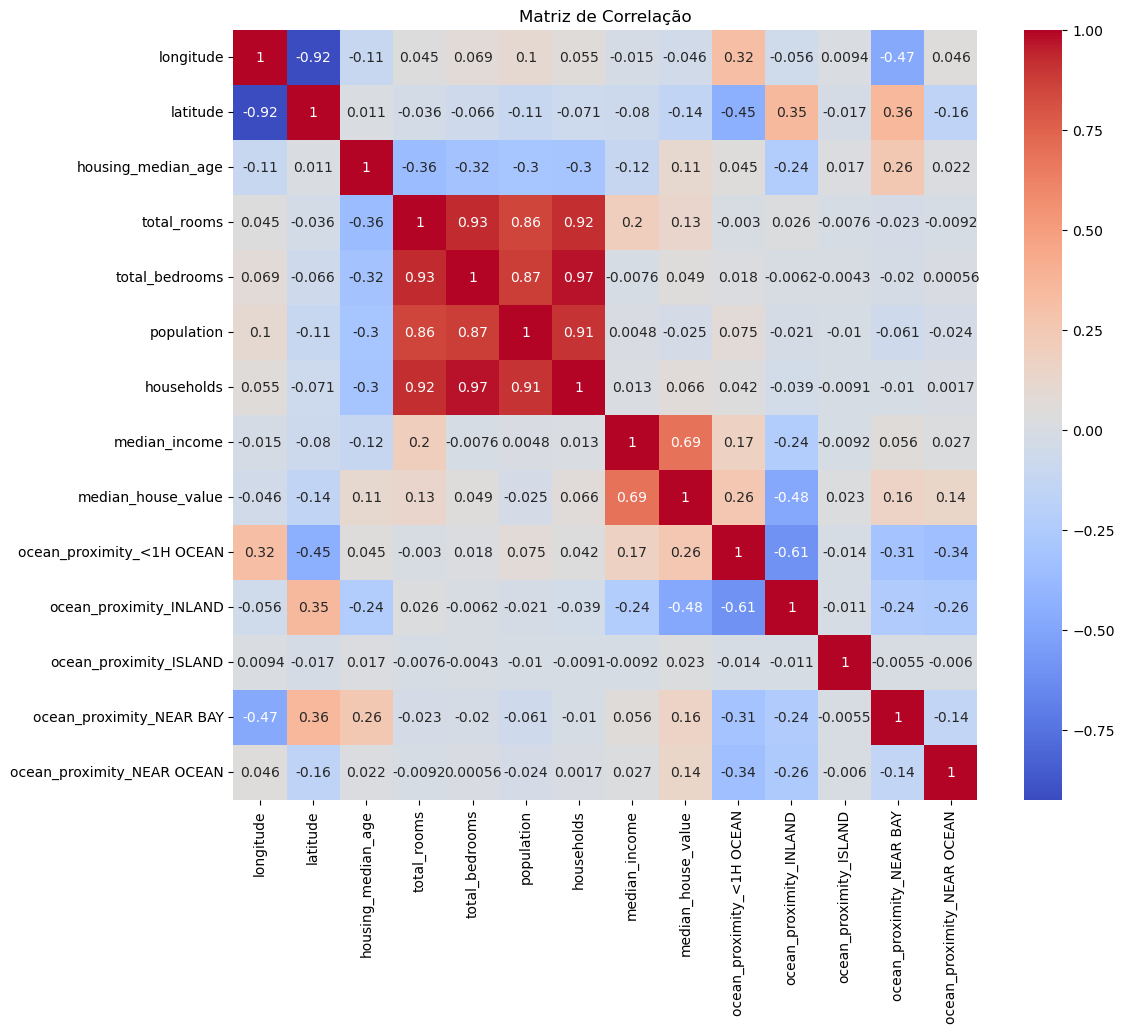

In [10]:
# Calculando a matriz de correlação
corr_matrix = house.corr()

# Criando o heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [11]:
# Correlações Fortes:

##Variáveis físicas: As variáveis total_rooms, total_bedrooms, population e households apresentam uma forte correlação positiva. Isso faz sentido, pois um aumento em uma dessas variáveis tende a implicar um aumento nas outras. Por exemplo, um grande número de quartos geralmente está associado a um número maior de quartos e, consequentemente, a uma população maior.
##Renda e valor da casa: A correlação positiva entre median_income e median_house_value é intuitiva: áreas com renda média mais alta tendem a ter casas com valores mais elevados.
##Correlações Negativas:

##Longitude e latitude: A correlação negativa entre essas duas variáveis é esperada, pois à medida que a longitude aumenta (movimento para leste), a latitude geralmente diminui (movimento para o sul) ou vice-versa.
##Variáveis de proximidade ao oceano: As variáveis categóricas que indicam a proximidade ao oceano são mutuamente exclusivas, o que explica as correlações negativas.

### 3. Separe os dados em validação e teste

In [13]:
# Separando os dados em treino e teste (80% para treino, 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separando o conjunto de treino em treino e validação (80% para treino, 20% para validação)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [15]:
# Criando os modelos
model_depth_8 = DecisionTreeRegressor(max_depth=8)
model_depth_2 = DecisionTreeRegressor(max_depth=2)

# Treinando os modelos
model_depth_8.fit(X_train, y_train)
model_depth_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [17]:
# Criando os modelos
model_depth_8 = DecisionTreeRegressor(max_depth=8)
model_depth_2 = DecisionTreeRegressor(max_depth=2)

# Treinando os modelos
model_depth_8.fit(X_train, y_train)
model_depth_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [18]:
from sklearn.metrics import mean_squared_error

# Previsões para o conjunto de treinamento
y_train_pred_depth_8 = model_depth_8.predict(X_train)
y_train_pred_depth_2 = model_depth_2.predict(X_train)

# Previsões para o conjunto de teste
y_test_pred_depth_8 = model_depth_8.predict(X_test)
y_test_pred_depth_2 = model_depth_2.predict(X_test)

# Calculando o MSE
mse_train_depth_8 = mean_squared_error(y_train, y_train_pred_depth_8)
mse_train_depth_2 = mean_squared_error(y_train, y_train_pred_depth_2)

mse_test_depth_8 = mean_squared_error(y_test, y_test_pred_depth_8)
mse_test_depth_2 = mean_squared_error(y_test, y_test_pred_depth_2)

print("Modelo com profundidade 8:")
print("MSE de treinamento:", mse_train_depth_8)
print("MSE de teste:", mse_test_depth_8)

print("\nModelo com profundidade 2:")
print("MSE de treinamento:", mse_train_depth_2)
print("MSE de teste:", mse_test_depth_2)

Modelo com profundidade 8:
MSE de treinamento: 3162856542.201824
MSE de teste: 4105430477.982587

Modelo com profundidade 2:
MSE de treinamento: 6662264370.205243
MSE de teste: 6896217359.579764


In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Fazendo previsões nos dados de validação
y_pred_depth_8 = model_depth_8.predict(X_val)
y_pred_depth_2 = model_depth_2.predict(X_val)

# Calculando as métricas
mse_depth_8 = mean_squared_error(y_val, y_pred_depth_8)
r2_depth_8 = r2_score(y_val, y_pred_depth_8)

mse_depth_2 = mean_squared_error(y_val, y_pred_depth_2)
r2_depth_2 = r2_score(y_val, y_pred_depth_2)

print("Modelo com profundidade 8:")
print("MSE:", mse_depth_8)
print("R²:", r2_depth_8)

print("\nModelo com profundidade 2:")
print("MSE:", mse_depth_2)
print("R²:", r2_depth_2)

Modelo com profundidade 8:
MSE: 4115323387.59969
R²: 0.7002931372542023

Modelo com profundidade 2:
MSE: 6832500028.543161
R²: 0.5024091777488191


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

In [21]:
#Com base nos resultados, a árvore com profundidade 8 parece ser a opção mais adequada.
#Porquê
#Menor overfitting: A diferença entre o MSE de treinamento e teste é menor, indicando que o modelo generaliza melhor para novos dados.


### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

(20640, 14)
longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
median_house_value            float64
ocean_proximity_<1H OCEAN        bool
ocean_proximity_INLAND           bool
ocean_proximity_ISLAND           bool
ocean_proximity_NEAR BAY         bool
ocean_proximity_NEAR OCEAN       bool
dtype: object
longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN

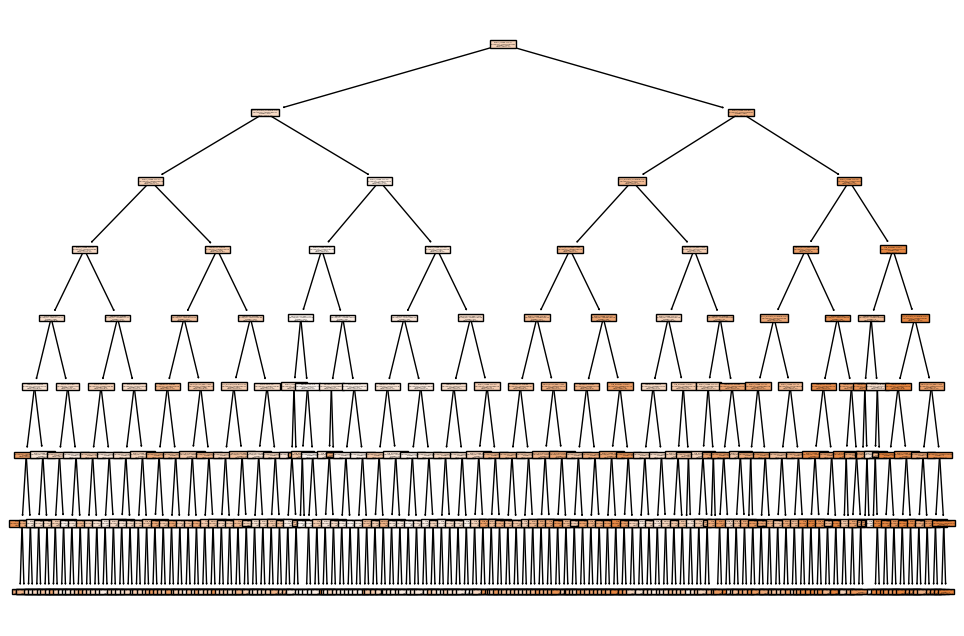

In [41]:
import pandas as pd
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Carregando os dados (substitua por seu método de carregamento)
X = house

# Verificando a forma de X
print(house.shape)

# Criando o DataFrame
X_df = pd.DataFrame(X, columns=[
    "longitude", "latitude", "housing_median_age", "total_rooms",
    "total_bedrooms", "population", "households", "median_income",
    "median_house_value", "ocean_proximity_<1H OCEAN",
    "ocean_proximity_INLAND", "ocean_proximity_ISLAND",
    "ocean_proximity_NEAR BAY", "ocean_proximity_NEAR OCEAN"
])

# Redefinindo o índice (se necessário)
X_df.reset_index(drop=True, inplace=True)

# Verificando os tipos de dados
print(X_df.dtypes)

# Verificando valores ausentes
print(X_df.isnull().sum())

# ... (seu código para treinar o modelo)

# Visualizando a árvore
plt.figure(figsize=(12, 8))
plot_tree(model_depth_8, filled=True, feature_names=X_df.columns)
plt.show()

(20640, 14)
longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
median_house_value            float64
ocean_proximity_<1H OCEAN        bool
ocean_proximity_INLAND           bool
ocean_proximity_ISLAND           bool
ocean_proximity_NEAR BAY         bool
ocean_proximity_NEAR OCEAN       bool
dtype: object
longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN

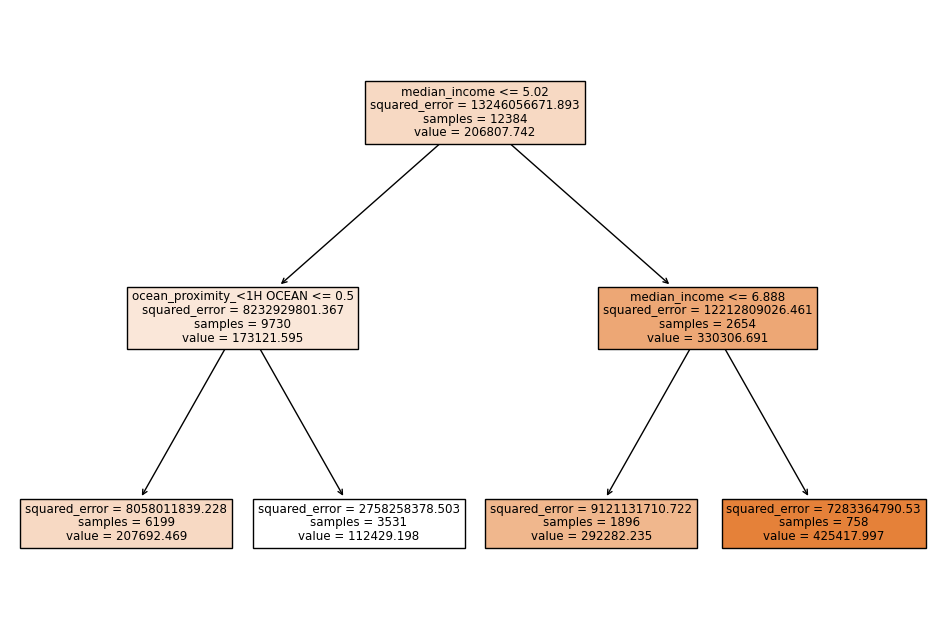

In [43]:
import pandas as pd
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Carregando os dados (substitua por seu método de carregamento)
X = house

# Verificando a forma de X
print(house.shape)

# Criando o DataFrame
X_df = pd.DataFrame(X, columns=[
    "longitude", "latitude", "housing_median_age", "total_rooms",
    "total_bedrooms", "population", "households", "median_income",
    "median_house_value", "ocean_proximity_<1H OCEAN",
    "ocean_proximity_INLAND", "ocean_proximity_ISLAND",
    "ocean_proximity_NEAR BAY", "ocean_proximity_NEAR OCEAN"
])

# Redefinindo o índice (se necessário)
X_df.reset_index(drop=True, inplace=True)

# Verificando os tipos de dados
print(X_df.dtypes)

# Verificando valores ausentes
print(X_df.isnull().sum())

# ... (seu código para treinar o modelo)

# Visualizando a árvore
plt.figure(figsize=(12, 8))
plot_tree(model_depth_2, filled=True, feature_names=X_df.columns)
plt.show()

In [ ]:
#Renda media seria a variavel mais importante